In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


In [2]:
# perceptron is a single unit of artifitial neuron, view it as a single unit of a more complex
#   neural network you have seen

# perceptron consists of:
# INPUTS -> WEIGHTS -> NET INPUT FUNCTON -> ACTIVATION FUNCTION -> OUTPUT
# X1..Xn -> w1...wn ->        sum        ->      sigmoid..etc   -> 1 OR 0

# Linear model:
# f(w, b) = transposed(w)*x + b

# activation function:
# returns 1 if value reaches certain treshold else 0
# g(z) = 1 if z >= 0 else 0 (this is example of "step" activation function)

# aproximaiton:
# ŷ = g(transposed(w)*x + b)

# perceptron update rule for each training sample x:
# alpha = learning_rate between 0 and 1
# delta_w = learning_rate * (y_actual - y_predicted) * x  
# w = w + delwa_w
# b = b + learning_rate * (y_actual - y_predicted)

# update rule explanation
# y  ŷ   result y-ŷ
# 1  1       0     result is correct, no change of weights
# 1  0       1     result is NOT correct, increase weights
# 0  0       0     result is correct, no change of weights
# 0  1      -1     result is NOT correct, DEcrease weights

In [3]:
from data_generation import GenerateDatasets

dataset = GenerateDatasets()
dataset = dataset.make_blobs(nr_blobs=2,
                   nr_samples=1000,
                   nr_cols=2,
                   size_left=1,
                   mode=1.5,
                   size_right=2,
                   scale_row=1,
                   scale_col=0.3,
                   random_seed=True)
X, y = dataset

In [4]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X[:10], y[:10]

(array([[1.66167416, 1.75720506],
        [1.67732136, 1.27521238],
        [1.54403719, 1.64894507],
        [1.6509888 , 1.57458235],
        [1.62490189, 1.30529488],
        [1.6498026 , 1.83635684],
        [2.23745894, 1.65065124],
        [2.13045595, 1.38025632],
        [1.58286384, 1.34016479],
        [1.52174503, 1.33819788]]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0]))

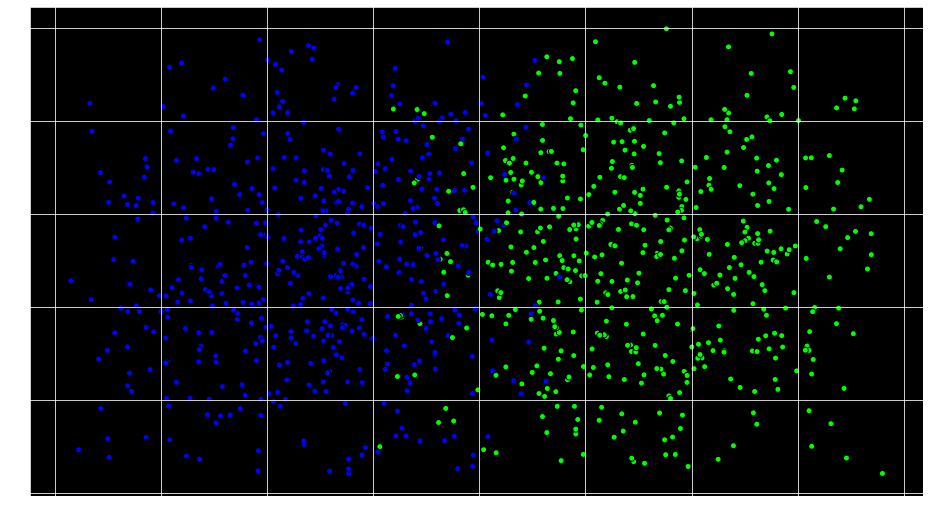

In [6]:
plt.style.use("dark_background")
plt.figure(figsize=(16, 9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", edgecolors="k")
plt.grid()
plt.show()

In [7]:
class Perceptron:
    def __init__(self, learning_rate=0.01, number_iterations=10):
        self.lr = learning_rate
        self.n_iters = number_iterations
        self.activation_funct = self._step_function
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # initialise weights with zero
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # this will calibrate on each sample from X_train and calculate the
        #   best weights and bias
        for _ in range(self.n_iters):
            # compute weights for each x_sample from X
            for index, x_sample in enumerate(X):
                linear_function = np.dot(x_sample, self.weights) + self.bias
                y_predicted = self.activation_funct(linear_function)
                
                update = self.lr * (y[index] - y_predicted)
                delta_w = update * x_sample
                
                self.weights += delta_w
                self.bias += update
                
    def predict(self, X):
        # this will predict output based on X_test and already known weights and bias
        
        # aproximaiton:
        # ŷ = g(transposed(w)*x + b)
        linear_function = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_funct(linear_function)
        return y_predicted
        
    def _step_function(self, x):
        """this is a activation function"""
        # emter confition into numpy.where() and return a result for each element in that array 
        return np.where(x>=0, 1, 0)

In [8]:
p = Perceptron(learning_rate=0.01, number_iterations=10)
p.fit(X_train, y_train)
y_pred = p.predict(X_test)

In [9]:
# accuracy
sum((y_test==y_pred) / len(y_pred))

0.9300000000000007

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


IndexError: tuple index out of range

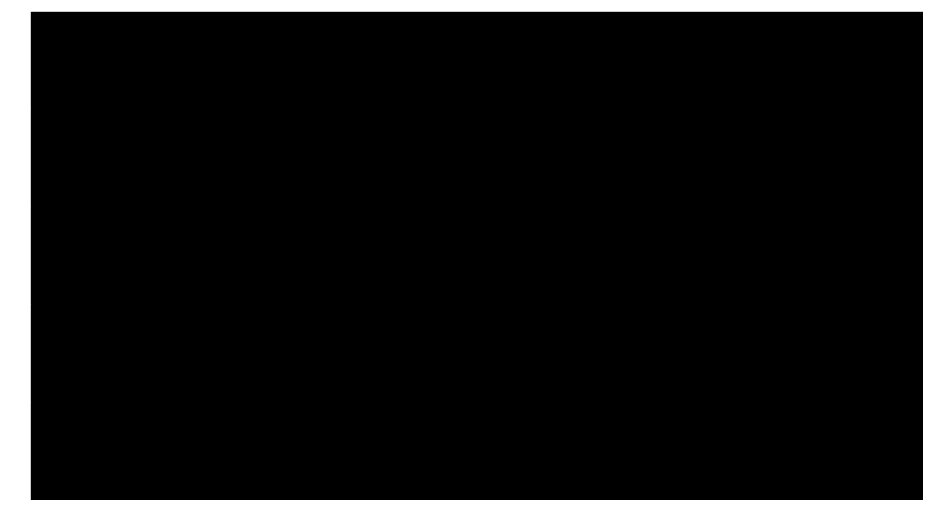

In [10]:
from data_plotting import Plots

plot = Plots()
plot.plot_decision_boundary(p,
                           X_test,
                           y_test,
                           expand=1,
                           bound_smoot=1000,
                           fig_size=(16, 9),
                           grid=False,
                           verbose=False,
                           cmap="brg")